| ![Logo](images/unilogo.png) |
|----------------------------------------------------------------------------|
| University of Greifswald physics department |

Magneto-optical Kerr Effect
===============================================
Authored by: [Nathan Belmore](https://plasma.physics.berkeley.edu/faculty-staff/nathan-belmore) 
In partnership with Tobias Tubandt


# Abstract
***
In this lab we examined the magnetic fields generated from crystalline structures surface magnetization using the magneto-optical Kerr effect. Using polarized light we traced a path over the surface of a sample with a $CoFeB$ layer and an $MgO$ interface layer. Once measured we changed the orientation of the sample to trace the same path with a perpendicular orientation, allowing us to examine the opposite polarization of reflected light.

# Physical Principles
***
## Crystalline Anisotropy
Crystalline structures can form in solids due to symmetry in the internal arrangement of atoms, allowing lattices to form and grow. In these lattices, the spin-orbit interactions can produce magnetic axes or planes. The orientation of these magnetic axes is related to the principal axis of its crystal lattice. If the magnetic axis is not aligned with the principal axis it's possible to get magnetization over the surface of the material, as exampled in Fig. 1. 


| ![Logo](images/manual1.png) |
|----------------------------------------------------------------------------|
| The energy structure of different ferromagnets: Cobald(a), Nickel(b), Iron(c), $Co_{50}Fe_{50}$(d) [1]. |

The anisotropy can be described with following expansion:

\begin{align*}
u_a = K_{u0} + K_{u1} \sin^2(\theta) + K_{u2} \sin^4(\theta) + ...
\end{align*}

Where the even orders that contribute to the angular component are interesting for the magnetization. $\theta$ is the angle starting from the axis. So in z-direction we get $\theta=0^{\circ}$ and is increasing in xy plane. The different orders $K_{u0}$, $K_{u1}$ and so on vary depending on the material.

## Interface effects

In addition to the anisotropy, there are interface effects, which restrict the degrees of freedom of the electrons. For example, through hybridization, it is possible to change the energy of certain orbitals to gain a profitable anisotropy. For the experiment, we use a sample with a $CoFeB$ layer and an $MgO$ interface layer. The layer thickness gradient is $\pm 0.3\;\mathrm{nm}$ that result in layer thickness from $0.8\;\mathrm{nm}$ to $1.4\;\mathrm{nm}$. This means we are getting a transition in magnetic anisotropy and a shift to perpendicular anisotropy (PMA). This transition will measure the reflected light passing one direction and measuring again backtracking the same path, we measure the hysteresis effect. 

## Magneto-optic Kerr Effect

We used the magneto-optic Kerr effect to measure the magnetization. Depending on the polarization and magnetization state of the light we are getting different absorption. By switching the plane of the measurement we can examine the polarization. The change in polarization can be calculated through Jones Matrices. For the experiment, we are using a photoelectric modulator that is changing the polarization of the light. Polarized light can be seen as a superposition of right and left polarized light, the corresponding wave is a shifted to be in the proper helicities. Ferromagnets have different absorption for right and left polarised light, seen in fig. 2. 

| ![Logo](images/manual2.png) |
|----------------------------------------------------------------------------|
| The difference of the absorption spectra in ferromagnets and paramagnets with right and left polarised light [1]. |


This results in a flip in the polarization plane. Using the proper settings for the analyzer the magnetization can be measured from the incoming intensities. an external magnetic field is used to change the magnetization. For the measurement, there are $3$ configurations. These come from the geometries of the magnetic field to the plane of incidence (fig.\ref{manual2}).

| ![Logo](images/manual3.png) |
|----------------------------------------------------------------------------|
| The $3$ different configurations of the measurement [1]. |


# Execution and Setup
***
As mentioned in the physical principles we use a sample with a $CoFeB$ layer to the interface of a $MgO$ layer. For the experiment, we are using an experimental setup designed and built from the from the Münzenberg group. While doing a series of measurements we are moving the sample $1\;\mathrm{mm}$ for every set of data. 

# Analysis
***



In [1]:
# Creating the correct Python enviroment for analysis
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema, savgol_filter


# Setting parameters to make plots clear for publication
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r"\usepackage{subdepth}, \usepackage{type1cm}"

### Importing the data

Some of the data sets contain multiple iterations, which are summed over to improve the statistics. 

In [167]:
# path to the data set
path = 'data/'

# Importing the intensity data.
# Some data structure for genetrating a list of the files. 
files = []

for file in os.listdir(path):
    if file.endswith(".txt"):
        files.append(os.path.join(path, file))
files.sort()
# print('Files imported:')
# print(*files, sep='\n')

# Writing the data to the rawdata array.
data = []

for path in files:
    data.append(pd.read_table(path, sep='\s+', engine='python', skiprows=5, names=['field', 'count']))

/home/natephysics/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: read_table is deprecated, use read_csv instead.


## Task 1: In plane measurement

Laplacian method: Since we are interested in the points where derivate changes quickly we can look at the min and max of the Laplacian to see were the divergence points are.

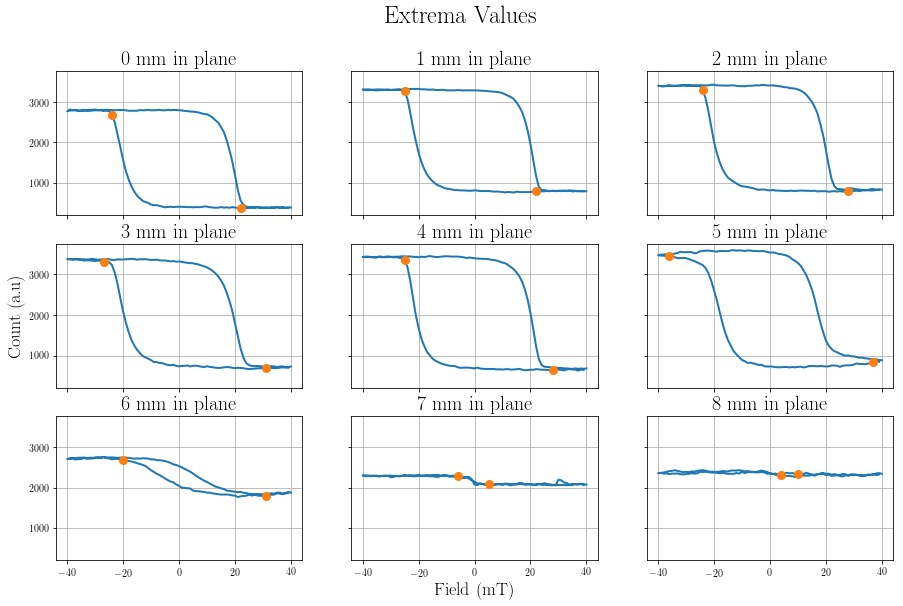

In [86]:
fig, ax = plt.subplots(3, 3, figsize=(15, 9), sharey=True, sharex=True)

diffIn = []

### Threshold method: using the difference between the counts on the 
### right sweep from the counts at the left sweep compared against a 
### threshold.

threshold = 52

for i in range(0, 7):
    # Takes the 'count' from data set i and takes a difference between
    # the right pass and left pass then compares the difference against
    # the threshold value.
    mask = np.abs(data[i]['count'][0:len(data[i])//2].values - \
                  data[i]['count'].iloc[::-1][0:len(data[i])//2].values) > threshold
    
    # Returns the index of values above the threshold
    y = np.where(mask)[0]
    
    assert len(y) >= 2, "Threshold too high, some data points have missing extrema"
    
    # Array of indecies for the first and last values that are above threshold 
    extrema = [np.max(y), np.min(y)]
    
    # Getting the x-y values of the extrema
    xextrema = [data[i]['field'][j] for j in extrema] 
    yextrema = [data[i]['count'][j] for j in extrema] 
    
    # Recording difference in field for later
    diffIn.append(np.abs(xextrema[0] - xextrema[1]))
    
    # Plotting
    ax[i//3, i%3].plot(data[i]['field'], data[i]['count'])
    ax[i//3, i%3].plot(xextrema, yextrema, 'o')
    ax[i//3, i%3].set_title(f'{i}mm in plane') 
    ax[i//3, i%3].grid(True)

for i in range(7, 9):
    # Smoothing the data sets
    y = savgol_filter(data[i]['count'], 15, 3) # window size 15, polynomial order 3
    
    # Calculate the max and min of the second derivatives
    extrema = [np.argmax(np.gradient(np.gradient(y))), 
               np.argmin(np.gradient(np.gradient(y)))]
    
    # Getting the x-y values of the extrema
    xextrema = [data[i]['field'][j] for j in extrema] 
    yextrema = [data[i]['count'][j] for j in extrema] 
    
    # Recording difference in field for later
    diffIn.append(np.abs(xextrema[1] - xextrema[0]))
    
    # Plotting
    ax[i//3, i%3].plot(data[i]['field'], data[i]['count'])
    ax[i//3, i%3].plot(xextrema, yextrema, 'o')
    ax[i//3, i%3].set_title(f'{i}mm in plane') 
    ax[i//3, i%3].grid(True)

# Lables
fig.suptitle('Extrema Values', fontsize=24)
ax[1, 0].set_ylabel('Count (a.u)')
ax[2, 1].set_xlabel('Field (mT)')

plt.show()

## Task 2: Out of plane measurement

Because of the structure of the data for the out of plane measurement, using the Laplacian method doesn't work well for the later data sets. Instead, we used the threshold method which uses the difference between the counts on the right sweep from the counts at the left sweep compared against a threshold values determined by inspection.

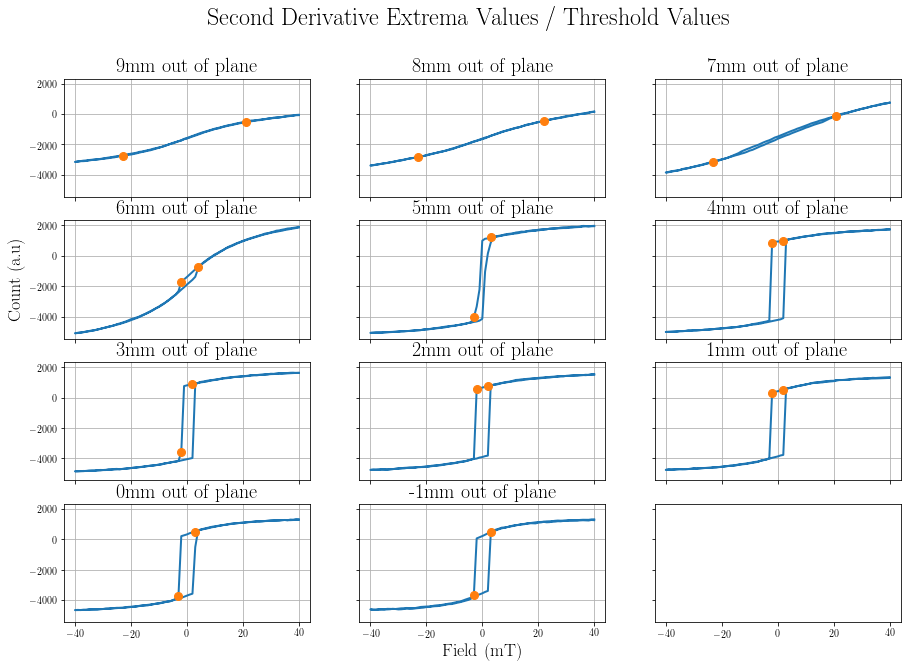

In [90]:
fig, ax = plt.subplots(4, 3, figsize=(15, 10), sharey=True, sharex=True)
diffOut = []

### Same Laplacian method method from in-plane measurement
### without smoothing.

for i in range(0, 3):
    # Select the correct data set
    y = data[i]['count']
    
    # Calculate the max and min of the second derivatives
    extrema = [np.argmax(np.gradient(np.gradient(y))), 
               np.argmin(np.gradient(np.gradient(y)))]
    
    # Getting the x-y values of the extrema
    xextrema = [data[i + 10]['field'][j] for j in extrema] 
    yextrema = [data[i + 10]['count'][j] for j in extrema] 
    
    # Recording difference in field for later
    diffOut.append(np.abs(xextrema[1] - xextrema[0]))
    
    # Plotting
    ax[i//3, i%3].plot(data[i + 10]['field'], data[i + 10]['count'])
    ax[i//3, i%3].plot(xextrema, yextrema, 'o')
    ax[i//3, i%3].set_title(f'{-i+9}mm out of plane') 
    ax[i//3, i%3].grid(True)

### Threshold method: using the difference between the counts on the 
### right sweep from the counts at the left sweep compared against a 
### threshold.

threshold = 75

for i in range(3, 11):
    # Takes the 'count' from data set i and takes a difference between
    # the right pass and left pass then compares the difference against
    # the threshold value.
    mask = data[i + 10]['count'][0:len(data[i + 10])//2].values - data[i + 10]['count'].iloc[::-1][0:len(data[i + 10])//2].values > threshold
    
    # Returns the index of values above the threshold
    y = np.where(mask)[0]
    
    assert len(y) >= 2, "Threshold too high, some data points have missing extrema"
    
    # Array of indecies for the first and last values that are above threshold 
    extrema = [np.max(y), np.min(y)]
    
    # Getting the x-y values of the extrema
    xextrema = [data[i + 10]['field'][j] for j in extrema] 
    yextrema = [data[i + 10]['count'][j] for j in extrema] 
    
    # Recording difference in field for later
    diffOut.append(np.abs(xextrema[1] - xextrema[0]))
    
    # Plotting
    ax[i//3, i%3].plot(data[i + 10]['field'], data[i + 10]['count'])
    ax[i//3, i%3].plot(xextrema, yextrema, 'o')
    ax[i//3, i%3].set_title(f'{-i+9}mm out of plane') 
    ax[i//3, i%3].grid(True)

fig.suptitle('Second Derivative Extrema Values / Threshold Values', fontsize=24)
ax[1, 0].set_ylabel('Count (a.u)')
ax[3, 1].set_xlabel('Field (mT)')

plt.show()

### Plotting difference in extrema

We can plot the difference in the field values between the points. Larger differences indicate the hysteresis effect occurs at a larger separation of field values. We expect a mirrored effect from the out of plane measurement because we are seeing the the other half of the reflected signal.

Text(0, 0.5, 'Difference in extrema (mT)')

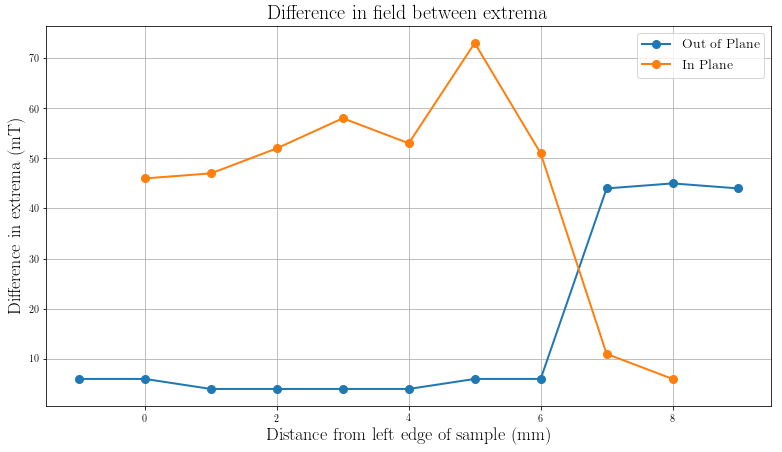

In [5]:
# Generating X axis
xIn = range(len(diffIn))
xOut = range(9, -2, -1)

# Ploting the Extremea
fig, ax = plt.subplots(figsize=(13, 7))
ax.plot(xOut, diffOut, 'o-', label='Out of Plane')
ax.plot(xIn, diffIn, 'o-', label='In Plane')
ax.grid(True)
ax.legend()
ax.set_title('Difference in field between extrema ') 
ax.set_xlabel('Distance from left edge of sample (mm)')
ax.set_ylabel('Difference in extrema (mT)')

### Plotting volume between curves

To get a sense of the hysteresis we can also plot the volumes between the two curves. Same idea as above but a different type of metric. The measurement won't be as clear as above because the area traced out by the out of plane measurement isn't as large. This might have to do with a shifting of the sample between measurements. Fortunately, the effect was still apparent from the above plot. 

Text(0, 0.5, 'Difference Between Extrema (mT)')

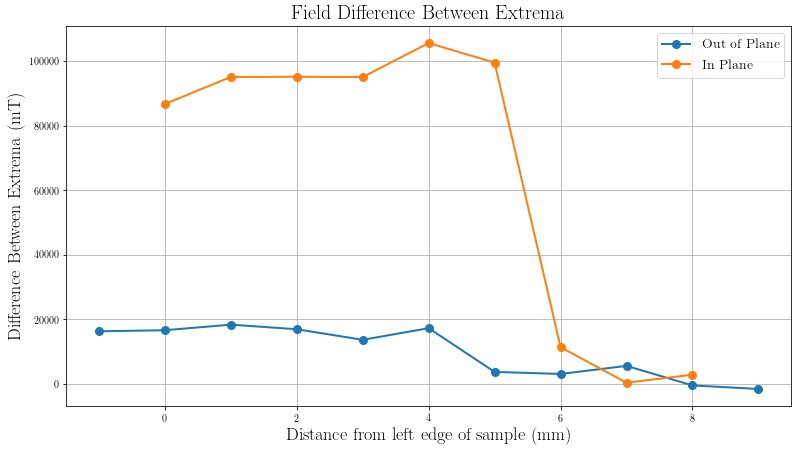

In [6]:
# Generating Y axis for in-plane.
diffIn2 = []

for i in range(0, 9):
    diffIn2.append(np.abs(np.sum(data[i]['count'][0:len(data[i])//2].values - \
                  data[i]['count'].iloc[::-1][0:len(data[i])//2].values)))

# Generating Y axis for out of plane.
diffOut2 = []

for i in range(0, 11):
    diffOut2.append(np.sum(np.abs(data[i + 10]['count'].iloc[::-1][0:len(data[i + 10])//2].values)) - \
                  np.sum(np.abs(data[i + 10]['count'][0:len(data[i + 10])//2].values)))

# Ploting the Extremea
fig, ax = plt.subplots(figsize=(13, 7))
ax.plot(xOut, diffOut2, 'o-', label='Out of Plane')
ax.plot(xIn, diffIn2, 'o-', label='In Plane')
ax.grid(True)
ax.legend()
ax.set_title('Field Difference Between Extrema') 
ax.set_xlabel('Distance from left edge of sample (mm)')
ax.set_ylabel('Difference Between Extrema (mT)')

## Normalize the data

For the next operation we need the data normalized and x-shifted to 0.

In [168]:
# We want to rescale the data between [-1,1]
for i in range(len(data)):
    data[i]['count'] = data[i]['count'] * 2/(data[i]['count'].max()-data[i]['count'].min()) + \
    (-data[i]['count'].max()-data[i]['count'].min())/(data[i]['count'].max()-data[i]['count'].min())

# Shift the x-axis to 0 for the first half of the data set.
for i in range(10):
    data[i]['field'] = data[i]['field'] - np.interp(0, 
                                                    data[i]['count'][0:len(data[i])//2].values, 
                                                    data[i]['field'][0:len(data[i])//2].values)
    
# for i in range(11):
#     data[i + 10]['field'] = data[i + 10]['field'] - np.interp(0, 
#                                                               data[i + 10]['count'][0:len(data[i + 10])//2].values, 
#                                                               data[i + 10]['field'][0:len(data[i + 10])//2].values)

Text(0, 0.5, 'Normalized Field')

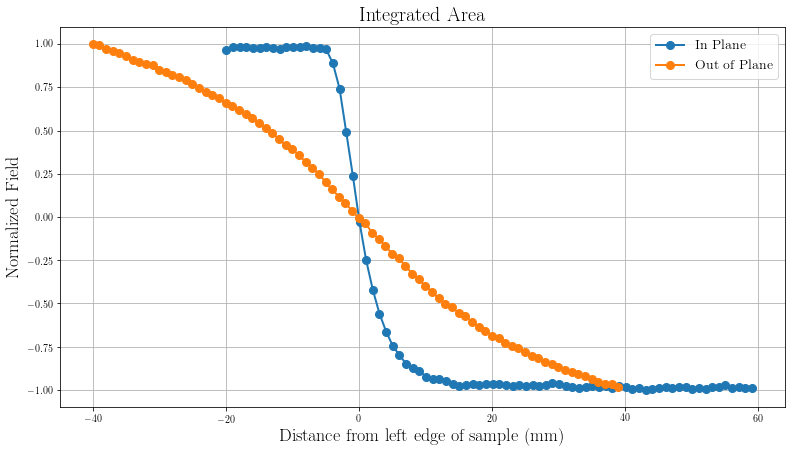

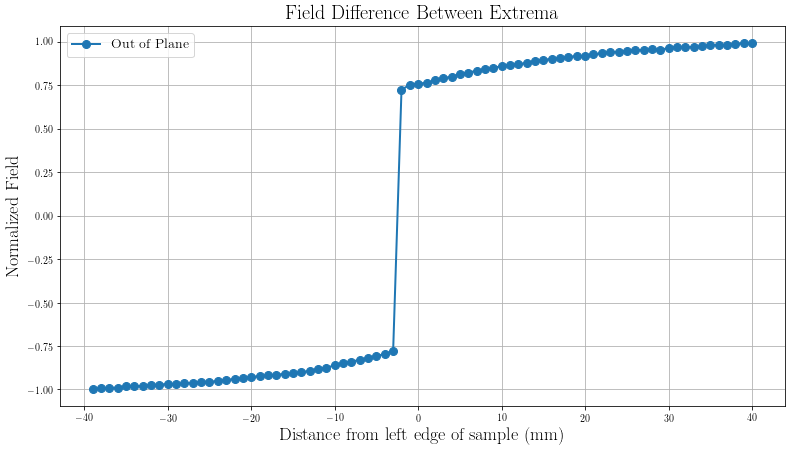

In [170]:
iin = 0
iout = 10
fig, ax = plt.subplots(figsize=(13, 7))
ax.plot(data[iin]['field'][0:len(data[iin])//2].values, data[iin]['count'][0:len(data[iin])//2].values, 'o-', label='In Plane')
ax.plot(data[iout]['field'][0:len(data[iout])//2].values * -1, data[iout]['count'][0:len(data[iout])//2].values, 'o-', label='Out of Plane')
ax.grid(True)
ax.legend()
ax.set_title('Integrated Area') 
ax.set_xlabel('Distance from left edge of sample (mm)')
ax.set_ylabel('Normalized Field')

iin = 5
iout = 15
fig, ax = plt.subplots(figsize=(13, 7))
ax.plot(data[iout]['field'][0:len(data[iout])//2].values, data[iout]['count'][0:len(data[iout])//2].values, 'o-', label='Out of Plane')
ax.grid(True)
ax.legend()
ax.set_title('Field Difference Between Extrema') 
ax.set_xlabel('Distance from left edge of sample (mm)')
ax.set_ylabel('Normalized Field')

At this point I don't have enough time to finish the analysis. I know that I need to x-shift the data and integrate the differences between the curves but I'm having trouble x-shifting the second half of the data and I've already spent way too much time on this lab. The first half shifted fine and I know it's some little problem that just needs to be debugged but at this point I really don't want to spend any more time on this lab. If I could finish this part I'd use the integrated volume of several data points to produce the K_eff*t graph.

# Conclusion
***

We are able to measure the change in the magnetization on a sample with a $CoFeB$ layer using the hysteresis as a proxy measurement for the layer thickness. We successfully managed to reproduce the crossing graph. If I had more time to work on the lab I would have rescaled the crossing graph using the 1.3T value from the Zbarsky thesis[2]. I would have liked to reproduce the graphs at the end of the thesis as well.

# References
***
[1] Lab Book

[2] Zbarsky, V. Spindynamik in Tunnelelementen mit senkrechter magnetischer Anisotropie, http://hdl.handle.net/11858/00-1735-0000-0022-5DB6-E